In [3]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle
from matplotlib.collections import PatchCollection

In [34]:
cell_size = mp.Vector3(16, 12, 0)
resolution = 30
pml_thickness = 1.0
air = mp.Medium(epsilon=1.0)
dielectric = mp.Medium(epsilon=3.5)

## _**Geometrias Básicas en $R^{2}$**_

In [5]:
def visualize_geometry(geometry, title="Geometría", zoom=None):
    """Función para visualizar geometrías con Matplotlib"""
    sim = mp.Simulation(
        cell_size=cell_size,
        geometry=geometry,
        resolution=resolution,
        boundary_layers=[mp.PML(pml_thickness)]
    )
    sim.init_sim()
    eps_data = sim.get_epsilon()
    
    plt.figure(figsize=(10, 8))
    plt.imshow(eps_data.T, cmap='viridis', 
              extent=[-cell_size.x/2, cell_size.x/2, -cell_size.y/2, cell_size.y/2])

    if zoom:
        plt.xlim(zoom[0])
        plt.ylim(zoom[1])
    
    plt.title(title, fontsize=14)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.colorbar(label='Permitividad (ε)')
    plt.show()

-----------
Initializing structure...
time for choose_chunkdivision = 0.000257969 s
Working in 2D dimensions.
Computational cell is 16 x 12 x 0 with resolution 30
     block, center = (0,0,0)
          size (3,2,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (3.5,3.5,3.5)
time for set_epsilon = 0.219484 s
-----------


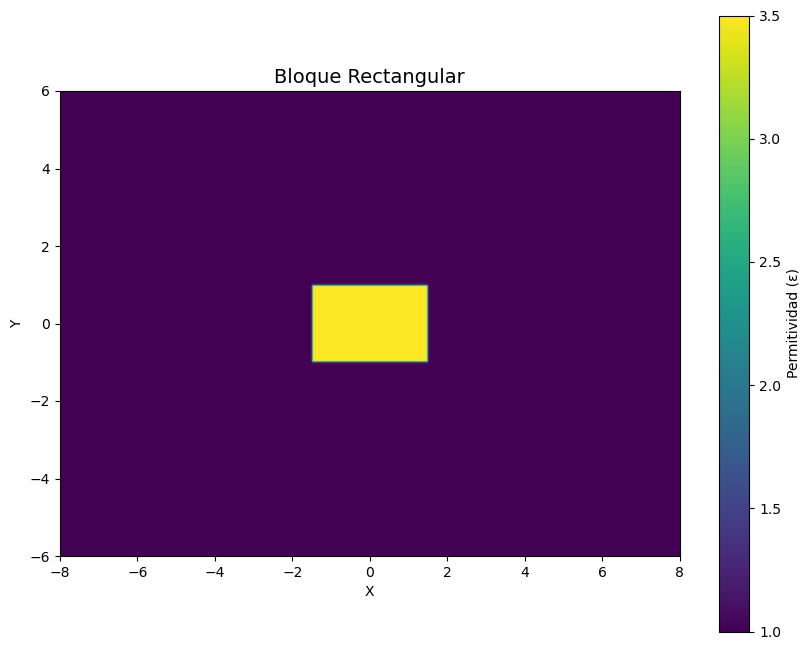

-----------
Initializing structure...
time for choose_chunkdivision = 0.000267982 s
Working in 2D dimensions.
Computational cell is 16 x 12 x 0 with resolution 30
     cylinder, center = (0,0,0)
          radius 1.2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (3.5,3.5,3.5)
time for set_epsilon = 0.236004 s
-----------


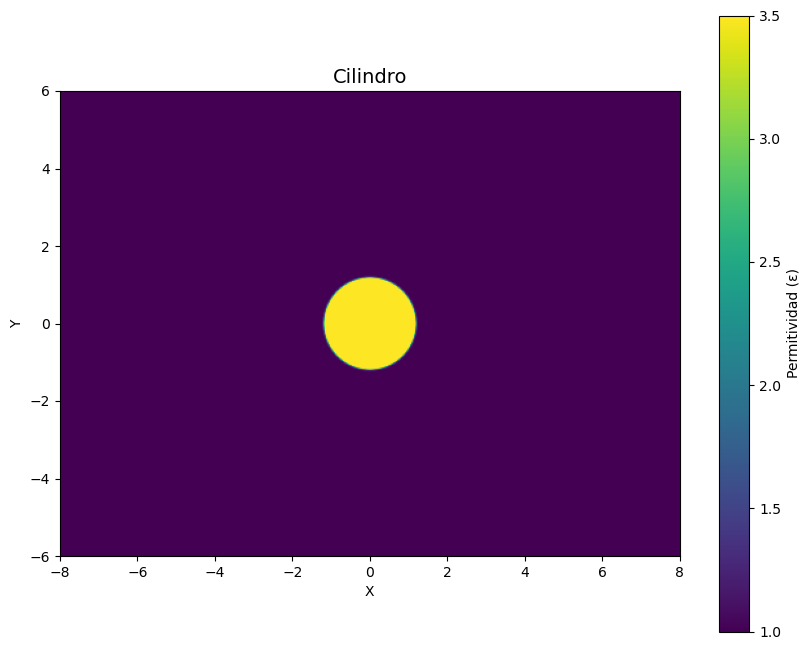

In [40]:
# ------------------------------------------------------------------
# Bloques (Prismas Rectangulares)
# ------------------------------------------------------------------

block = [mp.Block(
    size=mp.Vector3(3, 2),
    center=mp.Vector3(0, 0),
    material=dielectric
)]
visualize_geometry(block, "Bloque Rectangular")

# ------------------------------------------------------------------
# Cilindros
# ------------------------------------------------------------------
cylinder = [mp.Cylinder(
    radius=1.2,
    height=mp.inf,  # Infinito para 2D
    center=mp.Vector3(0, 0),
    axis=mp.Vector3(0, 0, 1),
    material=dielectric
)]

visualize_geometry(cylinder, "Cilindro")


### _**Uniones**_

-----------
Initializing structure...
time for choose_chunkdivision = 0.000273943 s
Working in 2D dimensions.
Computational cell is 16 x 12 x 0 with resolution 30
     cylinder, center = (0,0,0)
          radius 2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (3.5,3.5,3.5)
     cylinder, center = (0,0,0)
          radius 1.5, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.318785 s
-----------


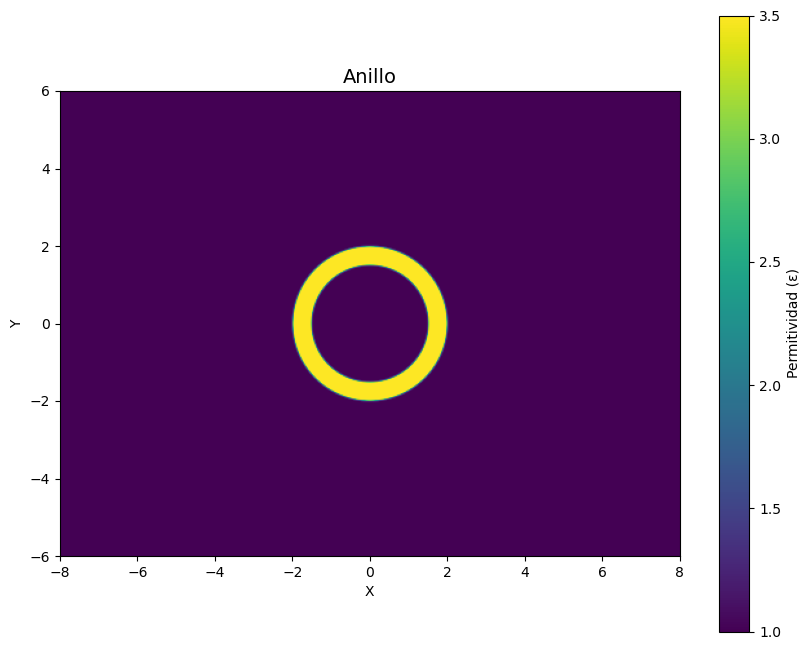

-----------
Initializing structure...
time for choose_chunkdivision = 0.000265121 s
Working in 2D dimensions.
Computational cell is 16 x 12 x 0 with resolution 30
     block, center = (-2.5,-3.5,0)
          size (12,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (3.5,3.5,3.5)
     block, center = (3.5,2,0)
          size (1,12,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (3.5,3.5,3.5)
time for set_epsilon = 0.237189 s
-----------


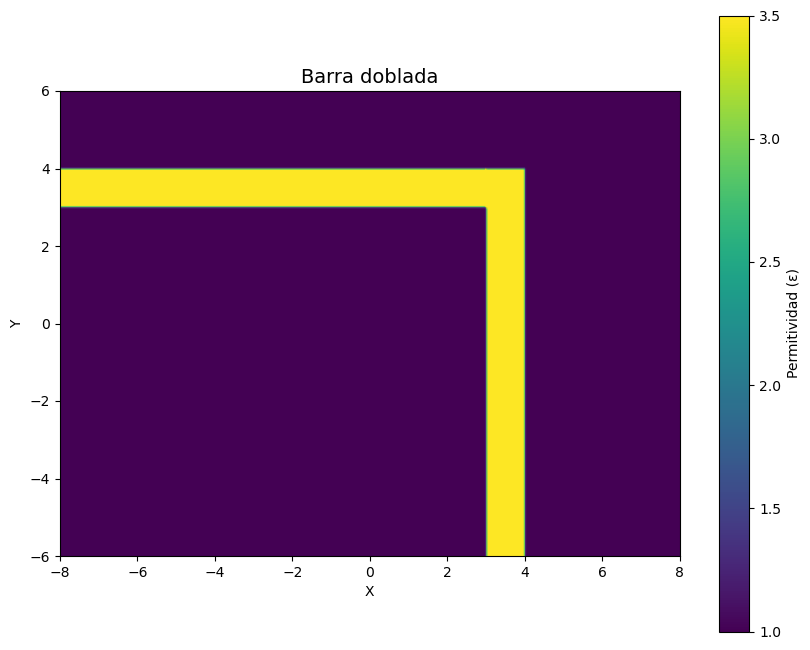

-----------
Initializing structure...
time for choose_chunkdivision = 0.000272036 s
Working in 2D dimensions.
Computational cell is 16 x 12 x 0 with resolution 30
     block, center = (0,0,0)
          size (8,8,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (3.5,3.5,3.5)
     cylinder, center = (0,0,0)
          radius 3, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.354564 s
-----------


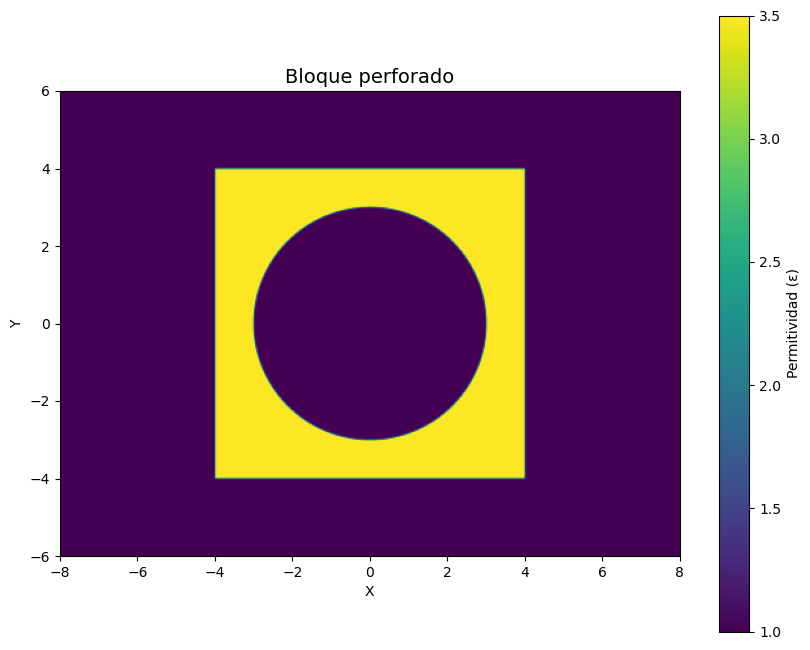

In [46]:
# ------------------------------------------------------------------
# Anillo
# ------------------------------------------------------------------
ring = [
    mp.Cylinder(radius=2.0, material=dielectric),
    mp.Cylinder(radius=1.5, material=air)  # Hueco interno
]

visualize_geometry(ring, "Anillo")
# ------------------------------------------------------------------
# Barra doblada pi/2
# ------------------------------------------------------------------
bend = [mp.Block(mp.Vector3(12,1,mp.inf),
                     center=mp.Vector3(-2.5,-3.5),
                     material=dielectric),
            mp.Block(mp.Vector3(1,12,mp.inf),
                     center=mp.Vector3(3.5,2),
                     material=dielectric)]
visualize_geometry(bend, "Barra doblada")
# ------------------------------------------------------------------
# Bloque perforado
# ------------------------------------------------------------------
perforated_block = [mp.Block(mp.Vector3(8,8,mp.inf),
                     center=mp.Vector3(0,0),
                     material=dielectric),
            mp.Cylinder(radius=3.0,
                     material=air)]
visualize_geometry(perforated_block, "Bloque perforado")

## _**Geometrias Básicas en $R^{3}$**_

-----------
Initializing structure...
time for choose_chunkdivision = 1.69277e-05 s
Working in 2D dimensions.
Computational cell is 16 x 12 x 0 with resolution 30
     sphere, center = (0,0,0)
          radius 1
          dielectric constant epsilon diagonal = (10,10,10)
time for set_epsilon = 0.231847 s
-----------


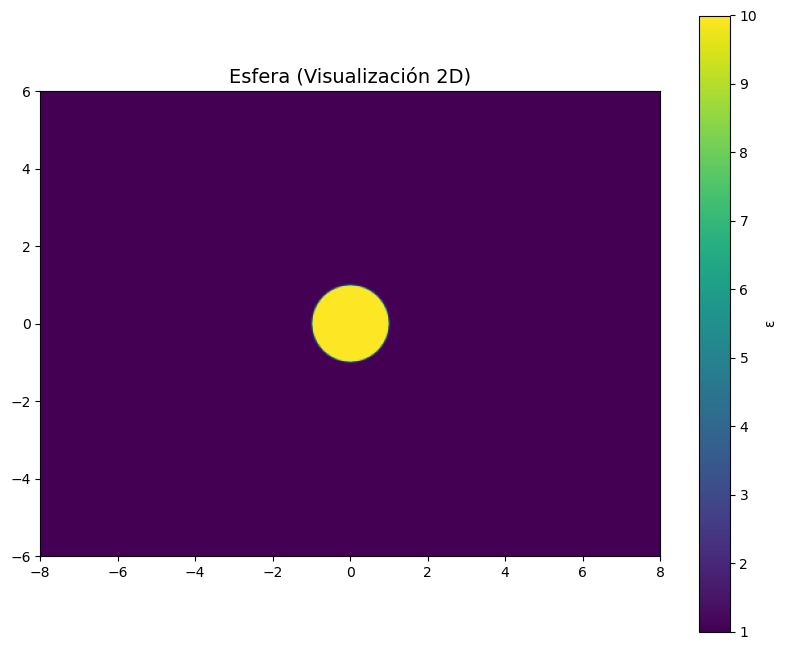

-----------
Initializing structure...
time for choose_chunkdivision = 2.09808e-05 s
Working in 2D dimensions.
Computational cell is 16 x 12 x 0 with resolution 30
     cone, center = (0,0,0)
          radius 1.5, height 3, axis (0, 0, 1)
          radius2 0
          dielectric constant epsilon diagonal = (7,7,7)
time for set_epsilon = 0.232498 s
-----------


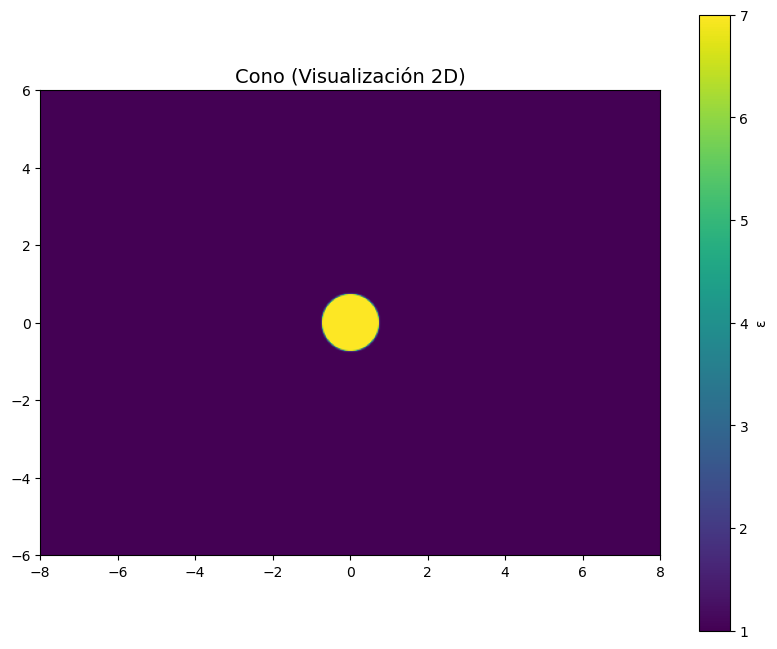

In [47]:
# Solo visualización 2D para el notebook
sphere = mp.Sphere(
    radius=1.0,
    center=mp.Vector3(0, 0, 0),
    material=mp.Medium(epsilon=10)
)

# Simulación 2D para visualización
sim = mp.Simulation(
    cell_size=cell_size,
    geometry=[sphere],
    resolution=resolution,
    dimensions=2  # Forzar visualización 2D
)
sim.init_sim()
eps_data = sim.get_epsilon()

plt.figure(figsize=(10, 8))
plt.imshow(eps_data.T, cmap='viridis', 
          extent=[-cell_size.x/2, cell_size.x/2, -cell_size.y/2, cell_size.y/2])
plt.title("Esfera (Visualización 2D)", fontsize=14)
plt.colorbar(label='ε')
plt.show()

# ------------------------------------------------------------------
# 1.4 Conos (3D)
# ------------------------------------------------------------------
cone = mp.Cone(
    radius=1.5,
    height=3.0,
    center=mp.Vector3(0, 0, 0),
    axis=mp.Vector3(0, 0, 1),
    material=mp.Medium(epsilon=7)
)

# Visualización 2D
sim = mp.Simulation(
    cell_size=cell_size,
    geometry=[cone],
    resolution=resolution,
    dimensions=2
)
sim.init_sim()
eps_data = sim.get_epsilon()

plt.figure(figsize=(10, 8))
plt.imshow(eps_data.T, cmap='viridis', 
          extent=[-cell_size.x/2, cell_size.x/2, -cell_size.y/2, cell_size.y/2])
plt.title("Cono (Visualización 2D)", fontsize=14)
plt.colorbar(label='ε')
plt.show()